#### Step 1: Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
print("Sucessfully Installed")

Sucessfully Installed


#### Step 2: Loading the Dataset

In [2]:
sales = pd.read_excel(r"C:\Users\Olym\Downloads\Data_Analysis_Self_Projects\Supermarket_Grocery_Sales\Supermart_Grocery_Sales_Retail_Analytics_Dataset.xlsx")
sales.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11 00:00:00,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11 00:00:00,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06 00:00:00,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10 00:00:00,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10 00:00:00,South,2355,0.26,918.45,Tamil Nadu


#### Step 3: Data Inspection

In [3]:
# Checking the shape and data types
print(sales.shape)
print(sales.dtypes)

# Checking for missing values
print(sales.isnull().sum())

# Summary statistics
sales.describe()

(9994, 11)
Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


#### Step 4: Data Pre-processing

In [4]:
# Converting 'Order Date' to datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Ensuring numeric columns are correct
sales['Sales'] = pd.to_numeric(sales['Sales'], errors='coerce')
sales['Profit'] = pd.to_numeric(sales['Profit'], errors='coerce')
sales['Discount'] = pd.to_numeric(sales['Discount'], errors='coerce')

# Removing duplicates
sales.drop_duplicates(inplace=True)

# Cleaning the categorical columns
sales['City'] = sales['City'].str.strip().str.title() #str - removes the extra spaces, title- ensures that the words start with capital letter
sales['Category'] = sales['Category'].str.strip().str.title()
sales['Sub Category'] = sales['Sub Category'].str.strip().str.title()

In [5]:
sales.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu


#### Srep 5: Exploratory Data Analysis

##### 1. Sales Trends Over Time

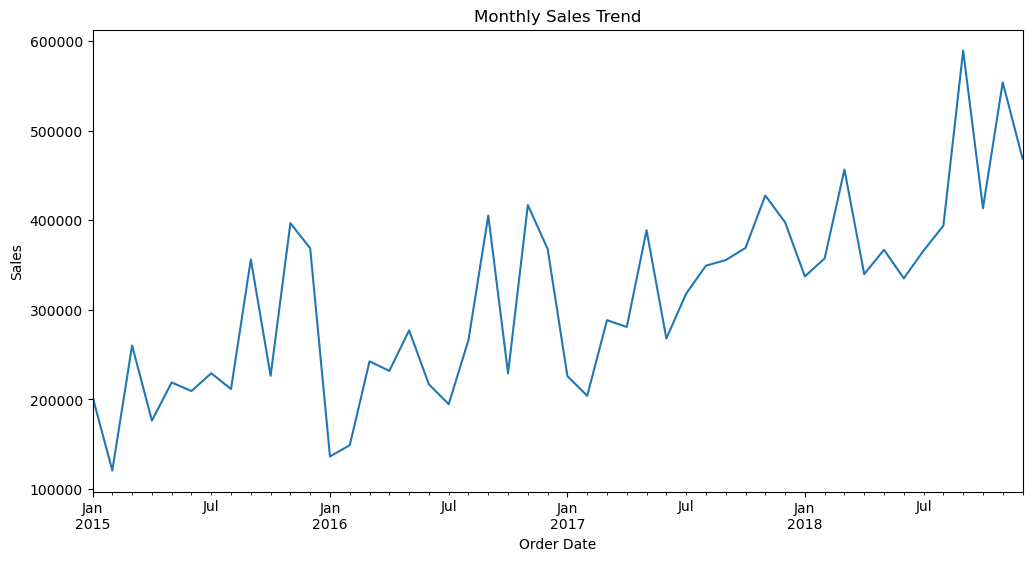

In [6]:
monthly_sales = sales.set_index('Order Date').resample('ME')['Sales'].sum()
monthly_sales.plot(figsize=(12,6), title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

##### 2. Category Performance

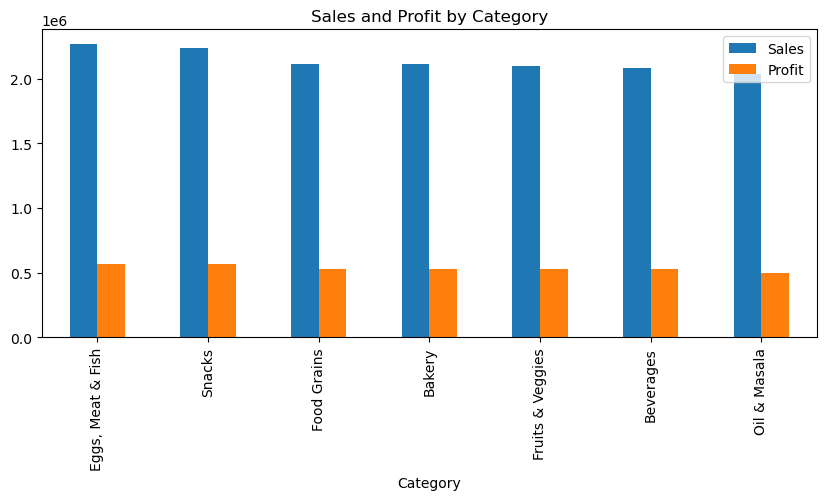

In [7]:
category_perf = sales.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
category_perf.plot(kind='bar', figsize=(10,4), title="Sales and Profit by Category")
plt.show()

##### 3. Discount Vs Profit

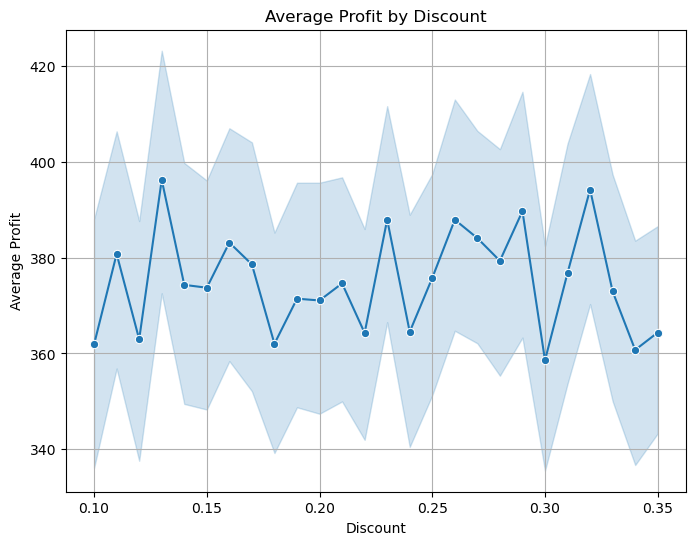

In [8]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Discount', y='Profit', data=sales, marker='o')
plt.title("Average Profit by Discount")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.grid(True)
plt.show()

##### 4. City & Region Analysis

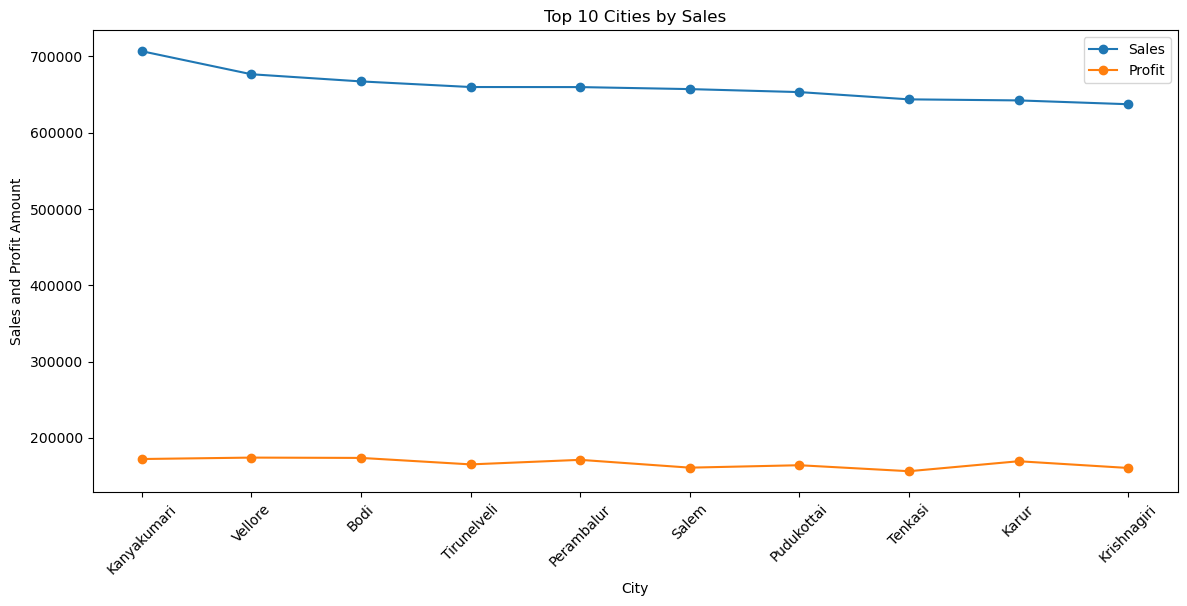

In [9]:
city_perf = sales.groupby('City')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
city_perf.head(10).plot(
    kind='line',
    figsize=(14,6),
    title="Top 10 Cities by Sales",
    ylabel="Sales and Profit Amount",
    xlabel="City",
    marker='o'   # add points to see all data clearly
)

plt.xticks(ticks=range(len(city_perf.head(10))),labels=city_perf.head(10).index,rotation=45) 
# Adding this line coz we were facing the issue of only 5 names coming up not 10 names on x-axis

plt.xticks(rotation=45) 
plt.show()

Business Insights

Top categories: Non Veg (Egg, Fish, Meat), Snacks and Food grains categories mainly drive the most sales and profit.

Regional focus: Among the cities in Tamil Nadu, Kanyakumari, Vellore, Tirunelveli, Perambalur, Salem, Pudukottai, Tenkasi, 
Karur and Krishnagiri emerge as the top contributors to overall Sales and Profit performance.

Seasonal trends: The sales pattern rises between July till Jan of every year, hence this is the favourable time to give 
more emphasis on marketing strategy.

Profit vs Discount: There's no proper pattern observed between the two parameters. Once with huge discount the sales tend to fall and vice versa.

#### Step 6 Feature Engineering

In [11]:
# Extracting the date features and creating 3 new columns- Year, Month and Weekday for better analysis
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month
sales['Weekday'] = sales['Order Date'].dt.day_name()

# Profit Margin
sales['Profit_Margin'] = sales['Profit'] / sales['Sales']

 #### Step 7: Label Encoding for Categorical Variables

In [12]:
# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
sales['Category'] = le.fit_transform(sales['Category'])   
# fit_transform() first learns the unique values/patterns in the data (fit) and then applies the transformation (transform) in one step.

sales['Sub Category'] = le.fit_transform(sales['Sub Category'])
sales['City'] = le.fit_transform(sales['City'])
sales['Region'] = le.fit_transform(sales['Region'])
sales['State'] = le.fit_transform(sales['State'])
sales['Year'] = le.fit_transform(sales['Year'])
sales['Month'] = le.fit_transform(sales['Month'])
sales['Weekday'] = le.fit_transform(sales['Weekday'])

# Display the first few rows after encoding
print(sales.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-08-11       2   
1      OD2         Sudha         1            13     8 2017-08-11       3   
2      OD3       Hussain         3             0    13 2017-12-06       4   
3      OD4       Jackson         4            12     4 2016-11-10       3   
4      OD5       Ridhesh         3            18    12 2016-11-10       3   

   Sales  Discount  Profit  State  Year  Month  Weekday  Profit_Margin  
0   1254      0.12  401.28      0     2      7        0           0.32  
1    749      0.18  149.80      0     2      7        0           0.20  
2   2360      0.21  165.20      0     2     11        6           0.07  
3    896      0.25   89.60      0     1     10        4           0.10  
4   2355      0.26  918.45      0     1     10        4           0.39  


#### Step 8: Feature Selection and Model Building

In [13]:
# Select features and target variable
features = sales.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Month'])
target = sales['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Step 9: Training a Linear Regression Model


In [14]:
 # Initialize the model
 model = LinearRegression()
 # Train the model
model.fit(X_train, y_train)
 # Make predictions
 y_pred = model.predict(X_test)

 #### Step 10: Evaluating the Model


In [15]:
# Evaluating the model performance using Mean Squared Error (MSE) and R-squared.
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 61804.12504238492
R-squared: 0.8126106332992206


#### Step 11: Visualizing the Results

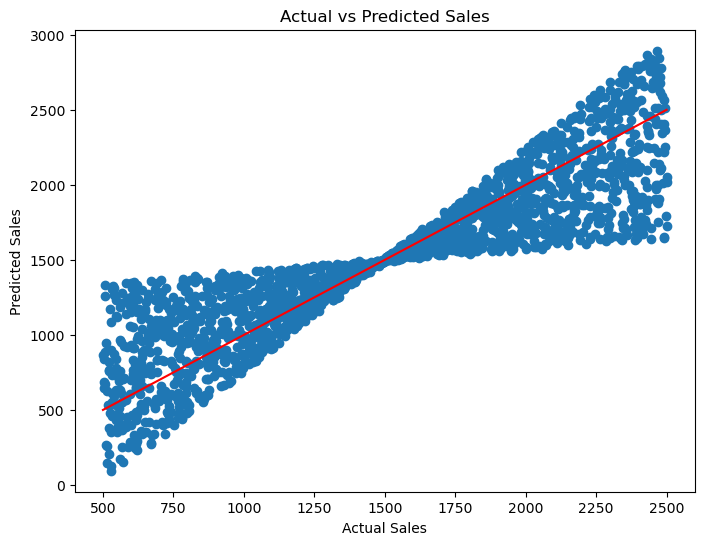

In [16]:
 # Actual vs Predicted Sales
 plt.figure(figsize=(8, 6))
 plt.scatter(y_test, y_pred)
 plt.plot([min(y_test),
 max(y_test)],
 [min(y_test),
max(y_test)], color='red')
 plt.title('Actual vs Predicted Sales')
 plt.xlabel('Actual Sales')
 plt.ylabel('Predicted Sales')
 plt.show()

#### Step 12: Conclusion

 ● The linear regression model provided a reasonable prediction for sales based
 on the features selected.
     
 ● Themodel’s R-squared value indicates a good fit, explaining a significant
 portion of the variance in sales.

 ● Further refinement of the model could involve trying different machine learning
 algorithms, such as decision trees or ensemble methods.


📈 Model Evaluation

The model’s performance was evaluated using two key regression metrics — Mean Squared Error (MSE) and R-squared (R²).

1. Mean Squared Error (MSE): 61,804.12

The MSE measures the average squared difference between actual and predicted sales values.

A lower MSE indicates that the model’s predictions are closer to the actual outcomes, signifying good accuracy and reliable performance.

2. R-squared (R²): 0.8126

The R² value represents the proportion of variance in the sales data that is explained by the model.

An R² score of 0.81 indicates that the model successfully explains approximately 81% of the variability in sales, which demonstrates a strong relationship between the features and the target variable.

Interpretation:

The model provides a solid predictive capability, effectively capturing major sales trends and customer behavior patterns. However, the remaining 19% of unexplained variance suggests there is still room for improvement through additional feature engineering, deeper data enrichment or alternative modeling approaches.